# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [3]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

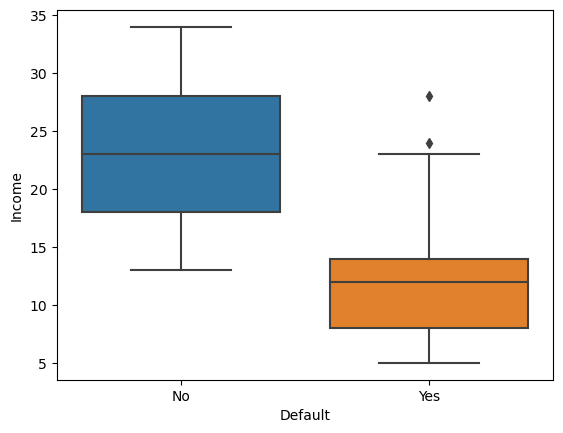

In [5]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')

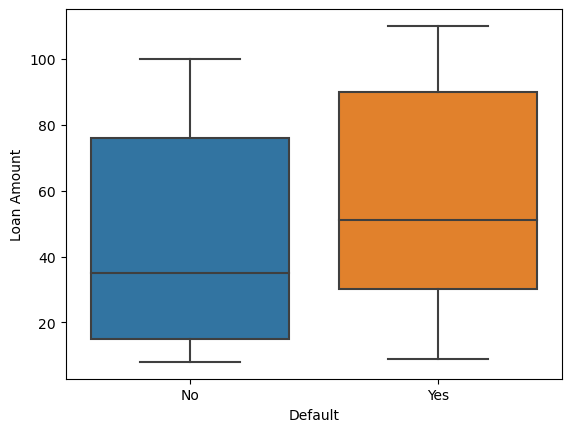

In [6]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

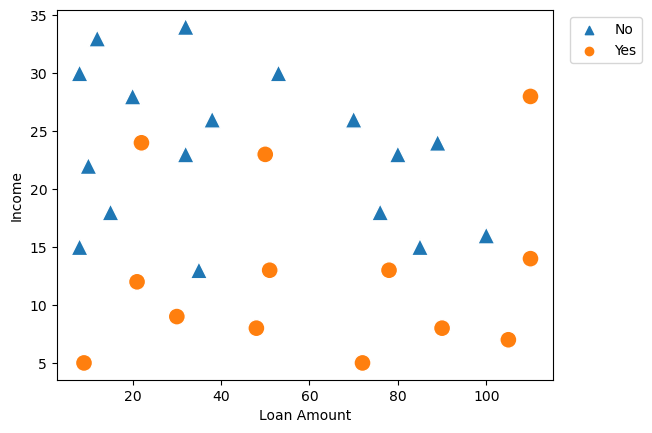

In [7]:
ax = sns.scatterplot(data = loan, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [8]:
y = loan[['Default']]

In [9]:
X = loan[['Income', 'Loan Amount']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234) 

In [11]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [13]:
model = classifier.fit(X_train, y_train)

In [14]:
model.score(X_test, y_test)

0.5

## 5. Visualize the Classification Tree

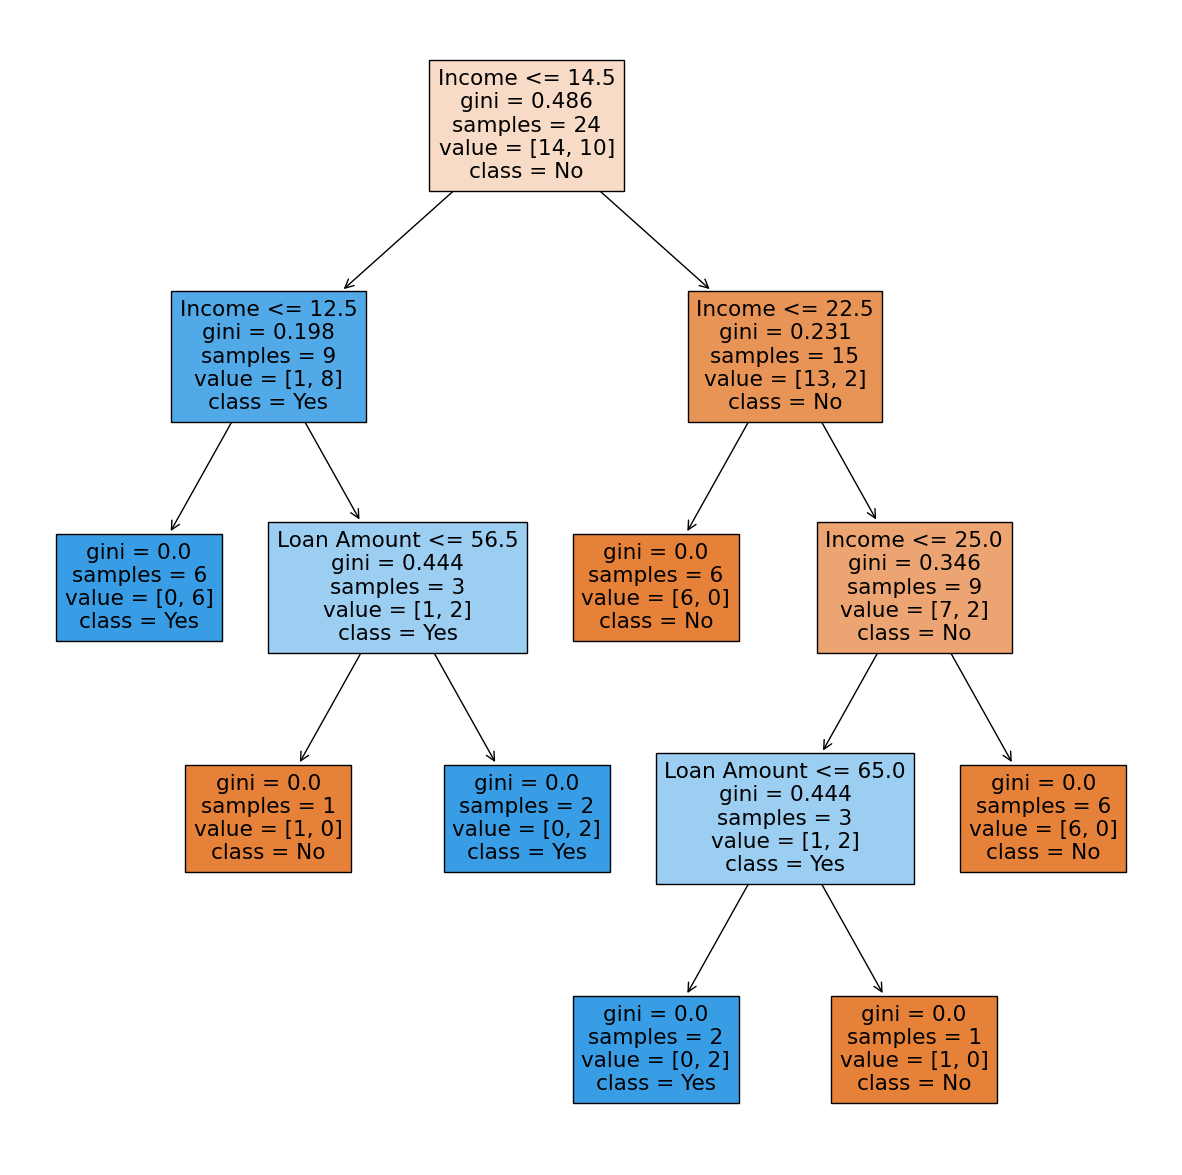

In [15]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);

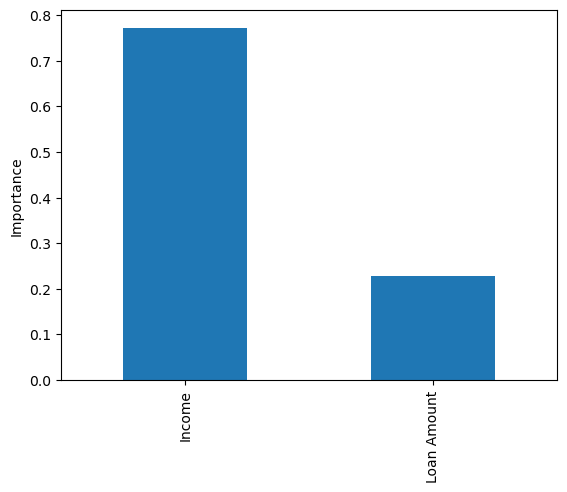

In [16]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

## 6. Prune the Classification Tree

In [17]:
model.score(X_train, y_train)

1.0

In [18]:
model.score(X_test, y_test)

0.5

In [19]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [20]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': [2, 3, 4]})

In [21]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=1234)

In [22]:
model_.score(X_train, y_train)

0.875

In [26]:
model_.score(X_test, y_test)

0.8333333333333334

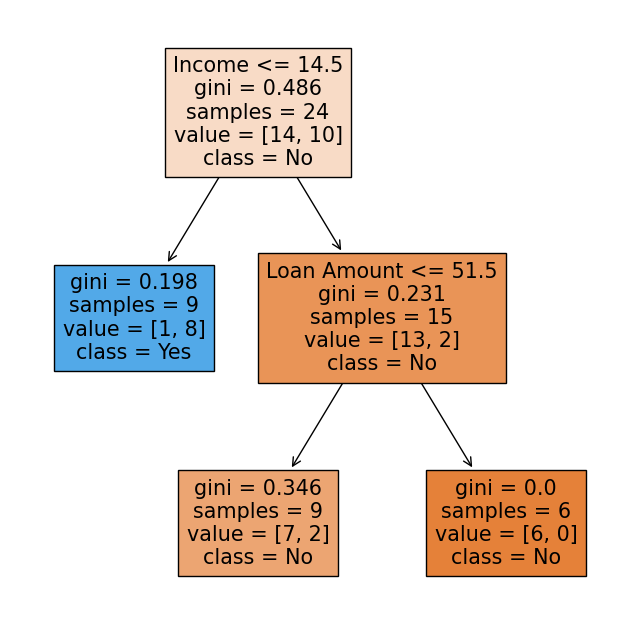

In [27]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True);